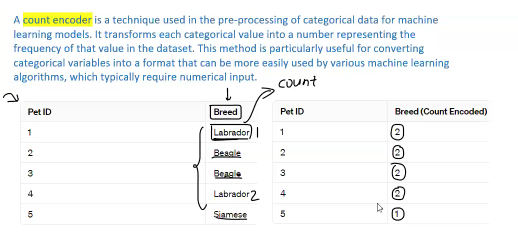

In [2]:
# dataset generation
import pandas as pd
import numpy as np
import category_encoders as ce

# Simulating a dataset
data = {
    'Age': np.random.randint(20, 60, size=100).astype(float),  # Random ages between 20 and 60
    'State': np.random.choice(['Karnataka', 'Tamil Nadu', 'Maharashtra', 'Delhi', 'Telangana'], size=100),
    'Education': np.random.choice(['High School', 'UG', 'PG'], size=100),
    'Package': np.random.rand(100) * 100  # Random package values for demonstration
}

# Introducing missing values in 'Age' column (5%)
np.random.seed(0)  # For reproducibility
missing_indices = np.random.choice(data['Age'].shape[0], replace=False, size=int(data['Age'].shape[0] * 0.05))
data['Age'][missing_indices] = np.nan

df = pd.DataFrame(data)

df.head()

,Age,State,Education,Package
0,50.0,Maharashtra,UG,82.509932
1,58.0,Delhi,High School,99.812122
2,NaN,Tamil Nadu,High School,9.891590
3,50.0,Delhi,PG,40.610780
4,43.0,Maharashtra,High School,91.239372


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns="Package"),df["Package"],test_size=0.2,random_state=13)

In [4]:
X_train["State"].value_counts()

State
Maharashtra    19
Telangana      19
Delhi          17
Tamil Nadu     15
Karnataka      10
Name: count, dtype: int64

In [5]:
X_train

,Age,State,Education
3,50.0,Delhi,PG
4,43.0,Maharashtra,High School
90,50.0,Telangana,PG
72,51.0,Maharashtra,UG
20,31.0,Maharashtra,PG
...,...,...,...
25,45.0,Telangana,UG
16,26.0,Telangana,High School
74,45.0,Telangana,High School
48,23.0,Maharashtra,High School


In [6]:
from category_encoders import CountEncoder

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import sklearn
trf1 = ColumnTransformer(transformers=[
    ("missing_age",SimpleImputer(strategy="mean"),["Age"]),
    ("Count_state",CountEncoder(),["State"]),
    ("education_ordinal",OrdinalEncoder(),["Education"])
]
)
sklearn.set_config(transform_output ="pandas")

In [8]:
trf1.fit_transform(X_train)

,missing_age__Age,Count_state__State,education_ordinal__Education
3,50.0,17,1.0
4,43.0,19,0.0
90,50.0,19,1.0
72,51.0,19,2.0
20,31.0,19,1.0
...,...,...,...
25,45.0,19,2.0
16,26.0,19,0.0
74,45.0,19,0.0
48,23.0,19,0.0


In [32]:
import pandas as pd
import numpy as np
import category_encoders as ce

# Simulating a dataset
np.random.seed(42)  # For reproducibility
data = {
    'State': np.random.choice(['Karnataka', 'Tamil Nadu', 'Maharashtra', 'Delhi', 'Telangana', None], size=100),
    'Education': np.random.choice(['High School', 'UG', 'PG', None], size=100)
}
df = pd.DataFrame(data)

df.head(25)

,State,Education
0,Delhi,PG
1,Telangana,High School
2,Maharashtra,High School
3,Telangana,High School
4,Telangana,PG
5,Tamil Nadu,High School
6,Maharashtra,None
7,Maharashtra,High School
8,Maharashtra,None
9,Telangana,None


In [33]:
df.isnull().sum()

State        17
Education    23
dtype: int64

In [36]:
import category_encoders as ce
cat = ce.CountEncoder(
    cols=["State","Education"],
    handle_missing = "error",
    handle_unknown ="error"
)
# handle_missing = "null","error","value"
# handle_unknown = "error","ignore"

In [37]:
cat.fit_transform(df)

ValueError: Columns to be encoded can not contain null

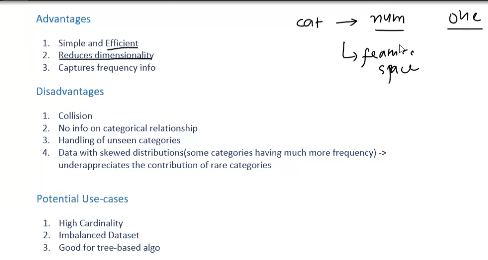